In [3]:
import numpy as np
import scipy.optimize as sp
import matplotlib.pyplot as plt

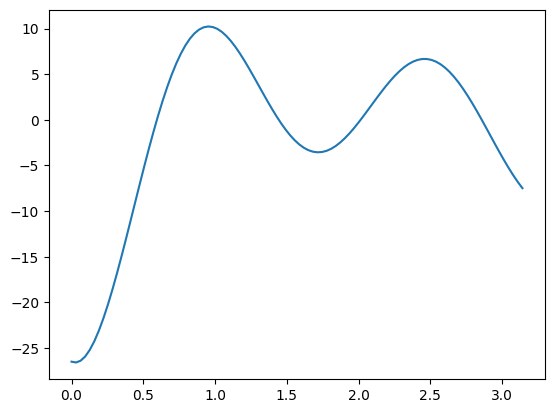

In [4]:
x = np.linspace(0,np.pi,100)
f = lambda x: (x**2-7*x+9)*np.cos(3*x+1)
fp = lambda x: (2*x-7)*np.cos(3*x+1) - 3*(x**2-7*x+9)*np.sin(3*x+1)
plt.plot(x,fp(x))

In [12]:
# function to optimize
f = lambda x: (x[0]-2)**2 + (x[1]-1)**4

# its gradient
gradf = lambda x: np.array([2*(x[0]-2),
                           4*(x[1]-1)**3])

# the hessian
gradf2 = lambda x: np.array([[2,0],
                             [0,12*(x[1]-1)**2]])

# tolerance level
tol = 1e-8

# initial guess
x0 = np.array([0,0])

In [13]:
def newton(g,gradg,x0,tol,alpha,beta):
    # set initial x value
    x = x0
    
    # set tolerance so we don't skip the while loop
    mag = tol + 1
    
    counter = 0
    
    # while loop
    while mag > tol:
        
        # evaluate gradient
        gradf = g(x)
        
        # evaluate hessian
        grad2f = gradg(x)

        # choose a descent direction (ex: the negative gradient)
        deltax = -np.linalg.solve(grad2f,gradf)

        # choose a stepsize (exact search method)
        newX = lambda t: x + t*deltax # new point as a function of t
        dfdt = lambda t: gradf(newX(t)) @ deltax # gradient of f wrt t
        
        stepsize = 1

        while f(x+stepsize*deltax) > f(x) + alpha * stepsize * deltax @ deltax:
            stepsize = stepsize*beta

        x = x + stepsize*deltax
        
        # check stopping criterion
        mag = gradf @ -deltax
        
        counter += 1
        
    return [x,f(x),counter]

In [7]:
newton(gradf,gradf2,x0,1e-10,0.4,0.49)

[array([2.        , 0.99847756]), 5.3722896571579995e-12, 16]